<a href="https://colab.research.google.com/github/ceyxasm/implementations/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Answering how often does the better team win and what is the significance of uncertainty and luck in a game.**

Every year 7-8 teams compete in what is called **Indian Premiere League**. They play around 60 matches (10-12 matches/ team) and finally we have our winner.
But


*   Can we be certain that better team did indeed win?
*   How does the probability of a team winning one match translate to winning the entire season
*   Does RCB play bad or are they just unlucky?



In [45]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1421)
# AB de Villiers scored 1421 runs off 611 balls in IPL death overs with 106 fours and 112 sixes.


In [46]:
#data read
#dataset- https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/IPL Matches 2008-2020.csv')
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [47]:
team1=np.array(data.iloc[:,6])
team2=np.array(data.iloc[:,7])
team=[]
for i in team1:
  if i not in team:
    team.append(i)

#all these teams have however not been part of all the seasons
#teams that have been part of all the seasons are:
#Royal Challengers Bangalore
#Kings XI Punjab
#Mumbai Indians
#Kolkata Knight Riders
#Rajasthan Royals
#Chennai Super Kings
####>>>>  https://www.quora.com/Is-there-any-IPL-player-who-played-in-all-season-from-the-same-team
#to make our analysis more uniform, we will be limiting ourself to these teams only and dropping the remaining
##LETS HOPE THIS DOESNOT CONTRIBUTE TO SAMPLING BAIS

#data preprocessing
row=data.shape[0]
drop_label=[]
drop_team=[ "Kochi Tuskers Kerala", "Pune Warriors",  "Gujarat Lions",
            "Rising Pune Supergiants", "Rising Pune Supergiant"   ]

for i in drop_team:
  data = data.loc[data["team1"] != i]
  data=  data.loc[data["team2"] != i]
print("data points before dropping: "+str(row)+"\ndata points after dropping: "+str(data.shape[0]))

data=data.replace({"Deccan Chargers":"Sunrisers Hyderabad","Delhi Capitals": "Delhi Daredevils" })
#"Deccan Chargers"--->"Sunrisers Hyderabad"
#"Delhi Capitals"----> "Delhi Daredevils"



data points before dropping: 816
data points after dropping: 701


In [48]:
#modifing our original dataframe
team1=np.array(data.iloc[:,6])
team2=np.array(data.iloc[:,7])
winner=np.array(data.iloc[:,10])
n_matches=len(team1)

team=[]
for i in range(len(team1)):
  if team1[i] not in team:
    team.append(team2[i])
  if team2[i] not in team:
    team.append(team2[i])

    
team_code=[]
for i in team:
  x=i.split()
  code=""
  for j in x:
    code+=j[0]
  team_code.append(code)
  print(code+" "+i)



KKR Kolkata Knight Riders
CSK Chennai Super Kings
RR Rajasthan Royals
RCB Royal Challengers Bangalore
SH Sunrisers Hyderabad
KXP Kings XI Punjab
DD Delhi Daredevils
MI Mumbai Indians


In [49]:
for i in range(n_matches):
  for j in range(len(team)):
    if team1[i]==team[j]: team1[i]=team_code[j]
    if team2[i]==team[j]: team2[i]=team_code[j]
    if winner[i]==team[j]: winner[i]=team_code[j]

team=team_code

KKR {'wins': 91, 'loss': 86, 'matches': 177, 'cups': 2, 'turnout': 0.5141242937853108}
CSK {'wins': 101, 'loss': 69, 'matches': 170, 'cups': 3, 'turnout': 0.5941176470588235}
RR {'wins': 76, 'loss': 78, 'matches': 154, 'cups': 1, 'turnout': 0.4935064935064935}
RCB {'wins': 79, 'loss': 100, 'matches': 179, 'cups': 0, 'turnout': 0.441340782122905}
SH {'wins': 83, 'loss': 100, 'matches': 183, 'cups': 1, 'turnout': 0.453551912568306}
KXP {'wins': 80, 'loss': 95, 'matches': 175, 'cups': 0, 'turnout': 0.45714285714285713}
DD {'wins': 77, 'loss': 101, 'matches': 178, 'cups': 1, 'turnout': 0.43258426966292135}
MI {'wins': 111, 'loss': 75, 'matches': 186, 'cups': 5, 'turnout': 0.5967741935483871}


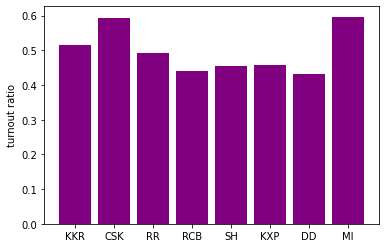

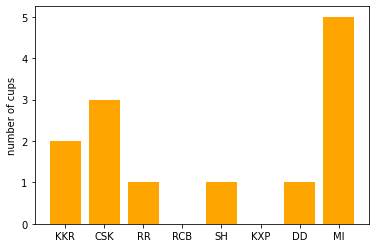

In [50]:
#summarizing our dataset in a dictionary
matches={}

for i in range(n_matches):
  if team1[i] not in matches:
    matches[team1[i]]={'wins':0,
                      'loss':0,
                      'matches':1}
  else: matches[team1[i]]['matches']+=1
  if winner[i]==team1[i]:
    matches[team1[i]]['wins']+=1
  else: matches[team1[i]]['loss']+=1

for i in range(n_matches):
  matches[team2[i]]['matches']+=1
  if winner[i]==team2[i]:
    matches[team2[i]]['wins']+=1
  else: matches[team2[i]]['loss']+=1

##adding number of season wins: 0 for RCB 3 for CSK like that
###>>>>>>>>>>>>>data compiled only till 2020 so dropping CSKs 2021 win; maybe u can contribute to the data set
for i in team:
  matches[i]['cups']=0
matches['MI']['cups']=5
matches['CSK']['cups']=3
matches['SH']['cups']=1
matches['RR']['cups']=1
matches['DD']['cups']=1
matches['KKR']['cups']=2

wins=[]
loss=[]
turnout=[]
cups=[]
for i in team_code:
  matches[i]['turnout']=matches[i]['wins']/(matches[i]['loss']+ matches[i]['wins'] )
  wins.append(matches[i]['wins'])
  loss.append(matches[i]['loss'])
  turnout.append(matches[i]['turnout'])
  cups.append(matches[i]['cups'])
  print(i, matches[i])



plt.bar(team, turnout, color='purple')
plt.ylabel('turnout ratio')
plt.show()
plt.bar(team, cups, color='orange' )
plt.ylabel('number of cups')
plt.show()

In [51]:


# seasonresult simulates the outcome of a season given as:
# match_count- number of matches a team plays before semifinals
# win_prob- probability of our team of winning an individual match
# considering our team of intrest is going to win semis and finals (WISHFUL THINKING);
# it must win atleast half of the preceding matches it played that season
def seasonresult(match_count, win_prob):
  win_count=0
  for i in range(match_count):
    if random.random() <= win_prob:
      win_count+=1
  return (win_count > (match_count)/2)



In [52]:
# simulate_season- mimic a season count number of times and plots
# probability of winning one match v/s probability of winning the season

def simulate_season( count): #simulates a season 'count' number of times
  p=0.5 #we vary our 1-game winning probability from 0.5 to 1 in steps of 0.01
  probs=[]
  season_win=[]
  while(p<=1):
    win=0
    for i in range(count):
      if seasonresult(7, p):
        win+=1
    probs.append(p)
    season_win.append(win/count)
    p+=0.01

  for i in range(len(probs)):
    if season_win[i]>=0.9:
      ideal_prob=probs[i]
      break

  plt.plot(probs, season_win)
  plt.axhline(y = 0.90, color = 'r', linestyle = '-')
  plt.axvline(x = ideal_prob, color = 'black', linestyle = '-')
  plt.xlabel('probability of winning a match')
  plt.ylabel('probability of winning the season')
  plt.show()
  print("therefore for a team to win the season 90% times, its probability of winning a single match should be:  "+ str(ideal_prob))
  


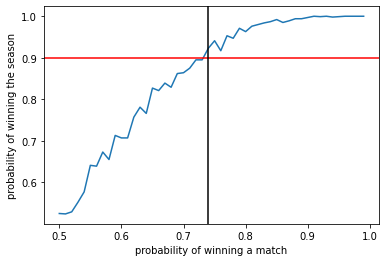

therefore for a team to win the season 90% times, its probability of winning a single match should be:  0.7400000000000002


In [53]:
simulate_season(1000)

For us to say that the better team wins the IPL (or have 90% confidence the better team shall win); their probability of winning on game must be around 0.74, but the best turnout (which is 0.596 by Mumbai Indians) is not even close.

Infact from the previous plot, its clear that with a 0.5XYZ probability of winning a match, the probability of winning the season is in same neighbourhood.

**This shows that events of 60 matches with 8 teams cannot be indicative of how good the team is**.
That is, we should not have polarized pooling of cups;
and yet we have celebrated teams like CKS and MI and then we have RCB which end up underperforming.

**So we ask, What is the confidence level that better team won 2021 IPL.** 
KKR v/s CSK

*Assuming that these winning percentages are accurate reflections of the relative strengths of these two teams*

In [54]:
#in 2021, each team played around 12 matches, that is roughlu 11 matches before appearing for semifinals
csk_win_rate=matches['CSK']['turnout']
kkr_win_rate=matches['KKR']['turnout']

won=0
simulation_count=1000 #we are going to simulate a season 1000 times
#if CSK plays 12-match series 1000 times, how many times will it win agains KKR?

for i in range(simulation_count):
  if seasonresult(11, csk_win_rate/(csk_win_rate+ kkr_win_rate)):
    won+=1

won_frac=won/simulation_count
print('If CSK plays 12-match series 1000 times, probability that it will win the season against KKR is: '+ str(won_frac))

If CSK plays 12-match series 1000 times, probability that it will win the season against KKR is: 0.562


Our confidence for the claim that better team won 2021 IPL is 0.562 which indeed is poor.
**Safe to says, 60 matches are very little to ensure better teams wins;** 
On same note what should be minimum number of matches per IPL to ensure that better team wins.

Or lets this address another intresting question, 
RCB perfroms poorly: but is it because they are unlucky or do they just play bad??
**Or given that, RCB loses the season, how may matches should it play to attribute their loss to lack of skill and disregard any role of luck??**

Mathematically-> 
H0: RCB is just unlucky, Find number of matches it need to play to reject the null hypothesis.

In [55]:
def frac_lost(win_prob, simulation_count, n_matches):
  # win_prob- winning probability of RCB winning one match
  # n_matches- number of matches it is supposed to play in one season
  # simulation_count- number of n_matches series RCB plays
  # function returns the probability of RCB losing the series given their win_prob and n_matches
  won=0
  for i in range(simulation_count):
    if seasonresult(n_matches, win_prob):
      won+=1
  return (simulation_count - won)/simulation_count

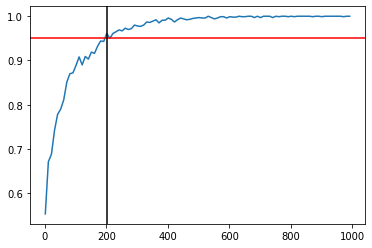

We RCB needs to play 201 matches for 95% cnfidence in claim 'RCB is not unlucky and just tend to play bad '


In [56]:

rcb_win=matches['RCB']['turnout']
def find_count(team_prob):
  simulation_count=1000 
  mx_count=1000
  step=10
  count=[]
  loss_frac=[]

  for i in range(1, mx_count, step):
    count.append(i)
    loss_frac.append(frac_lost( team_prob, simulation_count, i) )

  match_number=0
  for i in range(len(count)):
    if loss_frac[i]>=0.95:
      match_number=count[i]
      break


  plt.plot(count, loss_frac)
  plt.axhline(y = 0.95, color = 'r', linestyle = '-')
  plt.axvline(x = match_number , color = 'black', linestyle = '-')
  plt.show()
  print("We RCB needs to play "+str(match_number)+ " matches for 95% cnfidence in claim \'RCB is not unlucky and just tend to play bad \'")

find_count(rcb_win)
#print(rcb_win)

  

Since it is not feasible to conduct this many number of matches in order to reject our Null Hypothesis; we can give RCB benefit of doubt and say that: RCB is just one unlucky team